# Gemstone Price Prediction

The project aims to predict the prices of gemstones giving certain variables such as carat, cut, color, clarity, and dimension. It involves the use of supervised machine learning regression algorithms. The processes in this project are outlined below:

- Import Data and Data Summary


- Data Cleaning
    - Dealing with missing value
    - Dealing with zeros
    - Dealing with duplicates
    - Handling outliers


- Data Exploration
    - Univariate Analysis
    - Bivariate Analysis


- Data Pre-processing
    - Ordinal Encoding
    - Train, Validation, Test Splitting
    - Feature Scaling


- Model Training and Validation
    - Linear Regression
    - Polynomial Regression
    - Support Vector Regressor
    - Decision Tree Regressor
    - Random Forest Regressor
    - XGBoost Regressor


- Model Selection


- Final Model Testing

#### Description of Variables

- Price: The price of the gemstone
- Carat: The carat weight of the gemstone 
- Cut: The cut quality of the gemstome
- Color: The color of the gemstome. D is the best and J the worst
- Clarity: The absence of blemishes in the order FL (best), IF, VVS1, VVS2, VS1, VS2, SI1, SI2,I1, I2, I3 (worst)
- Depth: The height of the gemstone measured from the culet to the table, divided by its average girgle diameter
- Table: The width of the gemstone expressed as a percentage of its average diameter
- X: The length of the gemstone in mm
- Y: The width of the gemstone in mm
- Z: The height of the gemstone in mm

The data can be obtained on Kaggle at https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv

##### Import Libraries, Import Data, Data Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [6]:
# Unnamed column appears to be an index column.

df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(26967, 10)

## Data Cleaning
In cleaning the data, I will be dealing with the null values, the zero values, removing duplicates, and handling outliers

### Dealing with Null Values

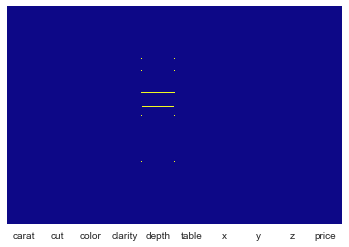

In [8]:
# Check for missing data using heatmap

sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='plasma')

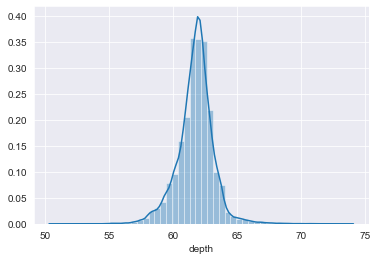

In [9]:
# There are null vlaues in depth column. Explore the distribution of depth

sns.distplot(df['depth'])

In [10]:
# Replace missing values in depth with the mean (depth is normally distributed)

df['depth'].fillna(df['depth'].mean(),inplace=True)

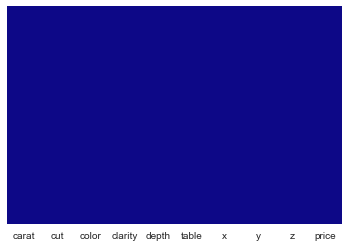

In [11]:
# Confirm that there are no more missing values

sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='plasma')

### Dealing with Zero Values

In [12]:
# Looking at the minimum values in the data description, there are 0s in columns x, y, and z. These are error values
# as it is not possible to have gemstone with no dimensions

for i in ['x','y','z']:
    print(f"Count of zeros in {i}: {df[df[i]==0][i].count()}")

Count of zeros in x: 3
Count of zeros in y: 3
Count of zeros in z: 9


In [13]:
# Drop rows with zeros

df.drop(df[df.x==0].index,inplace=True)
df.drop(df[df.y==0].index,inplace=True)
df.drop(df[df.z==0].index,inplace=True)

### Dealing with Duplicates

In [14]:
# Check if there are duplicates

print(f"Count of Duplicates: {df[df.duplicated()].count()[0]}")

Count of Duplicates: 33


In [15]:
# Drop dupicates

df.drop_duplicates(inplace = True)

In [16]:
df.shape

(26925, 10)

### Handling Outliers

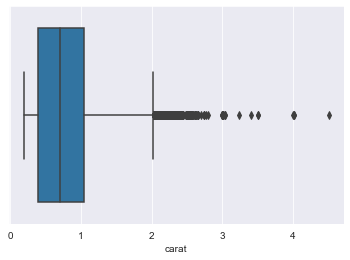

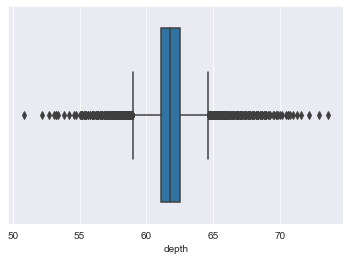

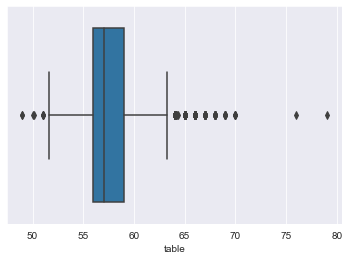

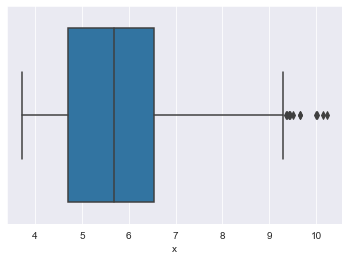

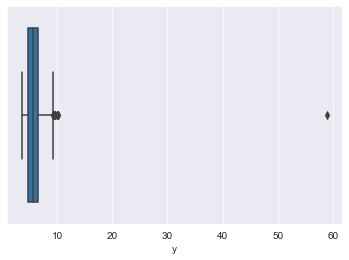

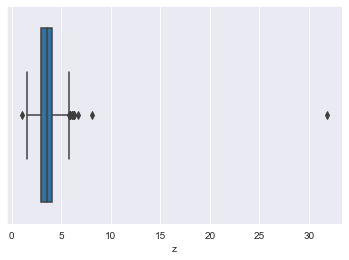

In [17]:
# Explore the distribution of the numerical independent variables

for i in ['carat','depth','table','x','y','z']:
    plt.figure()
    sns.boxplot(data=df,x=i)


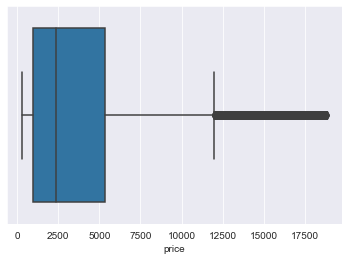

In [18]:
# Explore the distribution of the dependent variable - Price

sns.boxplot(data=df,x='price')

In [19]:
# Remove outlier using the z score as the cutoff. 
# Remove values above or below 3 times the standard deviation from the mean

def remove_outliers(col):
    cut_off = np.std(col) *3
    lower_range = np.mean(col) - cut_off
    upper_range = np.mean(col) + cut_off
    return lower_range, upper_range

In [20]:

for i in ['price','carat','depth','table','x','y','z']:
    
    lower_range, upper_range = remove_outliers(df[i])
    df = df[(df[i]>=lower_range) & (df[i]<=upper_range)]    

In [21]:
df.shape

(25541, 10)

##### Distribution of Variables After Removing Outliers

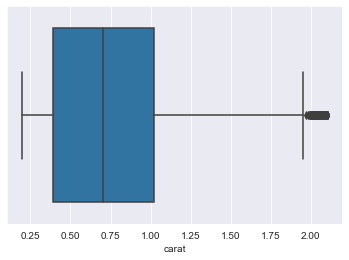

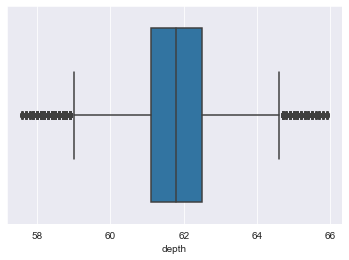

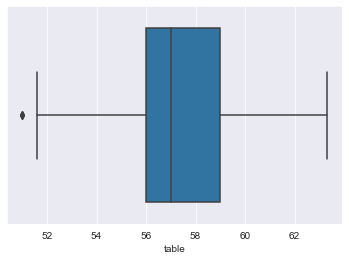

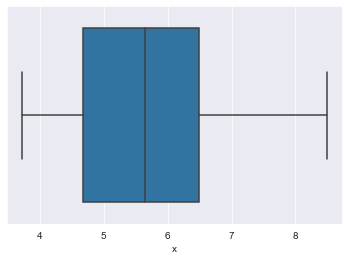

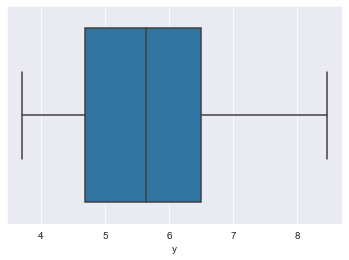

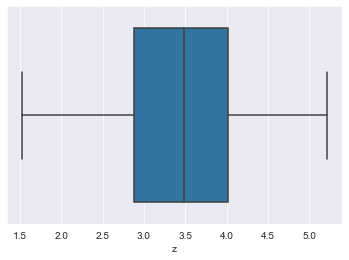

In [22]:
# Now explore the distribution of the independent variables after removing the outliers

for i in ['carat','depth','table','x','y','z']:
    plt.figure()
    sns.boxplot(df[i])

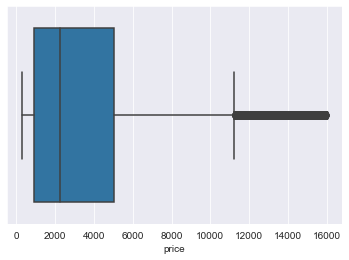

In [23]:
# Also, explore the distribution of the dependent variable (Price) after removing outliers

sns.boxplot(data=df,x='price')

## Data Exploration
This will involve a univariate analysis of all variable and a bivariate analysis between each variable and between each independent variable and the price

#### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAF3602190>,
      dtype=object)

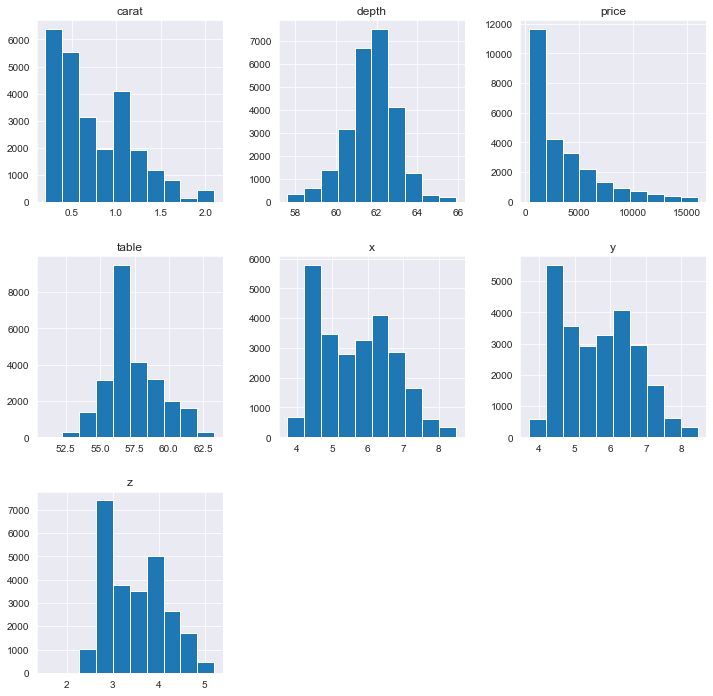

In [24]:
df.hist(figsize=(12,12))

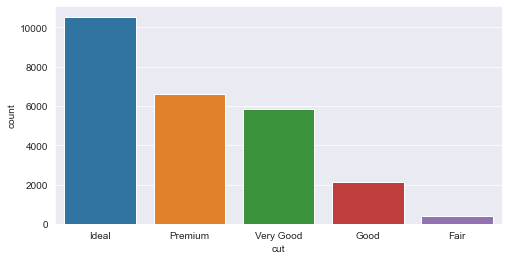

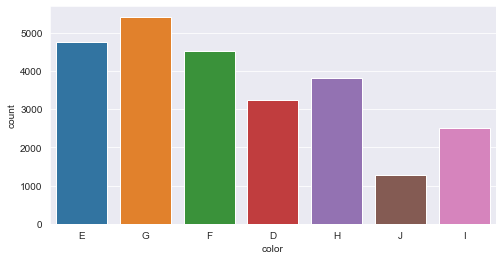

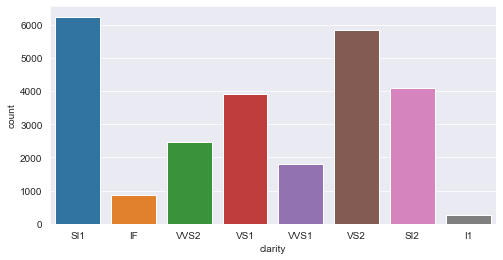

In [25]:
# Exploring the categorical variables

for i in ['cut','color','clarity']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=i)

#### Bivariate Analysis

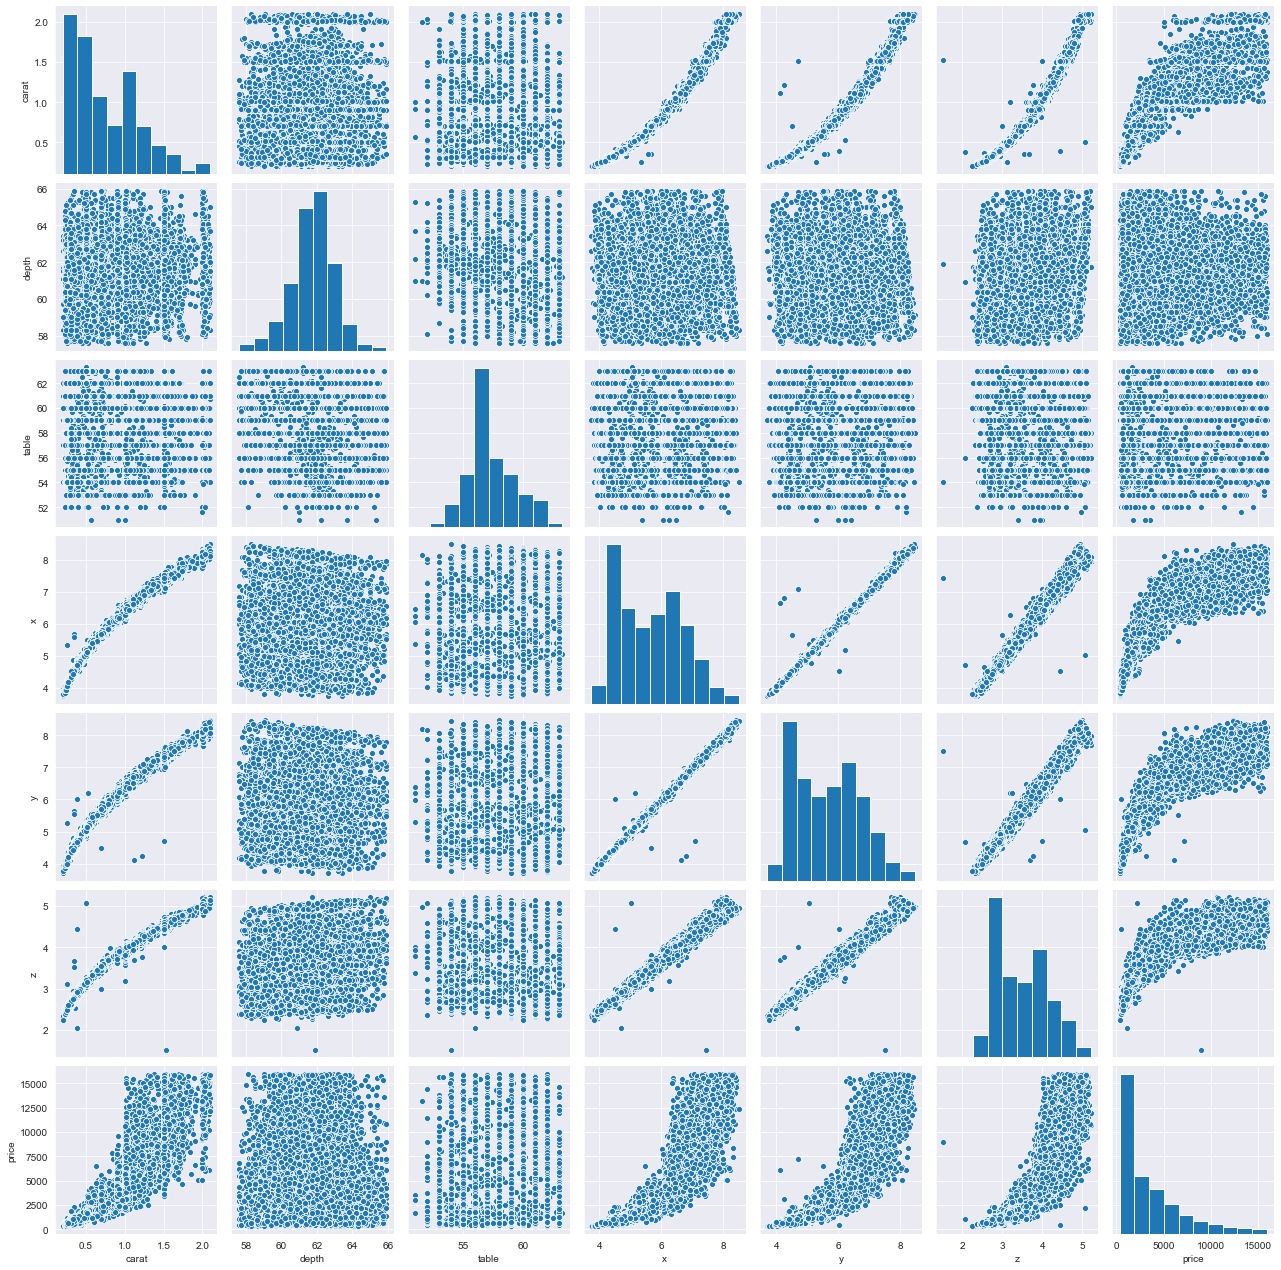

In [26]:
sns.pairplot(df)

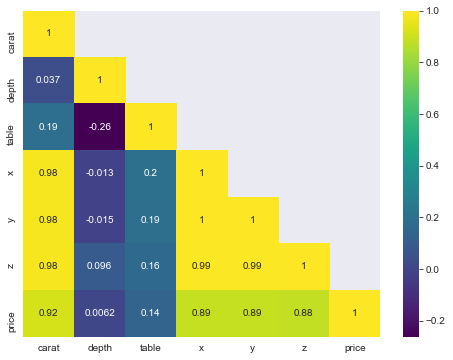

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',mask=np.triu(df.corr(),+1))

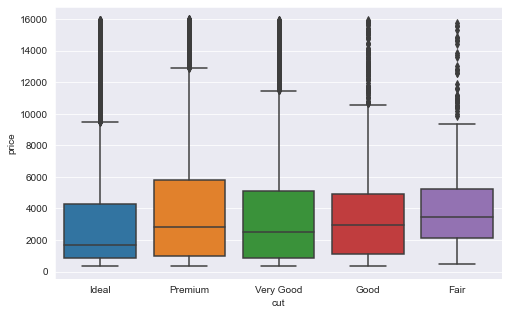

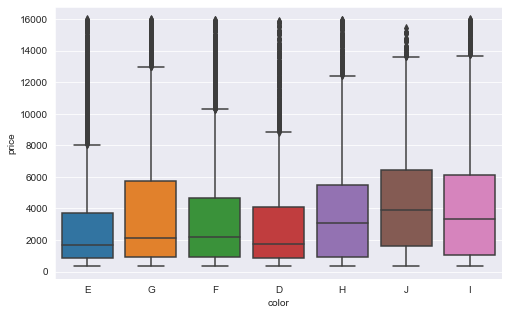

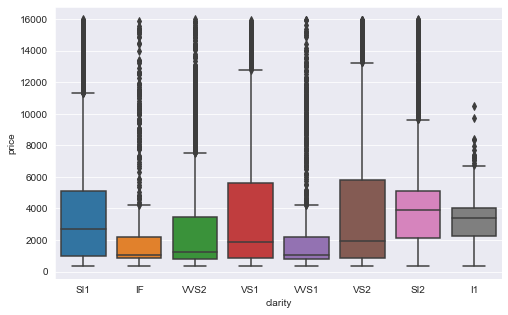

In [28]:
# Relationship between the categorical variables and price

for i in ['cut','color','clarity']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, y='price', x=i)

## Data Pre-processing
This will involves encoding the categorical variables and feature scaling

### Encoding Categorical Variables

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
oe = OrdinalEncoder(categories=[['J','I','H','G','F','E','D'],['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
                               ['Fair','Good','Very Good','Premium','Ideal']])

In [31]:
df[['color','clarity','cut']] = oe.fit_transform(df[['color','clarity','cut']])

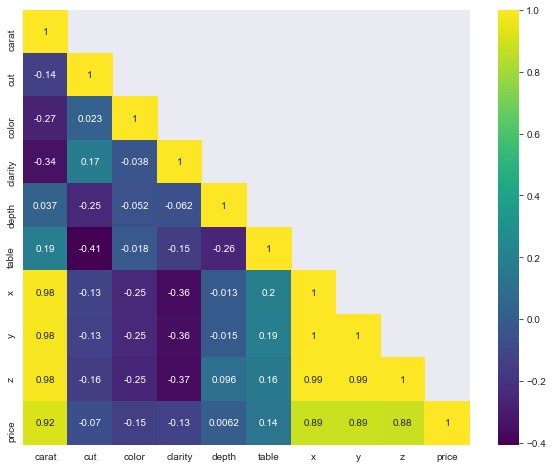

In [32]:
# Explore correlation of encoded categorical variable with the other variables

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',mask=np.triu(df.corr(),+1))


### Split Dataset into Training, Validation, and Testing set (70:18:12)
The training set will be 70% of the entire dataset. The Validation set will be 18%, and the final test set will be 12% of the entire dataset

In [33]:
X = df.drop('price',axis=1)

In [34]:
y = df['price']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# First split the data into Training and Test sets in ratio 70:30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
# Then split the test set (30%) into Validation and Test sets in ratio 60:40

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4)

### Feature Scaling
I need to scale the data as I will be using a Support Vector Regression algorithm, which works well only with scaled data

In [38]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_x.fit_transform(X_train)
X_val_scaled = sc_x.fit_transform(X_val)
X_test_scaled = sc_x.fit_transform(X_test)

y_train_scaled = sc_y.fit_transform(pd.DataFrame(y_train)).flatten()
y_val_scaled = sc_y.fit_transform(pd.DataFrame(y_val)).flatten()
y_test_scaled = sc_y.fit_transform(pd.DataFrame(y_test)).flatten()

## Models Training and Validation
The models used for the projects are Linear Regression, Polynomial Regression, Support Vector Regression, Data Tree Regressor, Random Forest Regressor, and XGBoost Regressor

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
lr.intercept_

-2932.001762333326

In [42]:
lr_coef = pd.DataFrame(lr.coef_,X.columns,['Coeff'])
lr_coef

,Coeff
carat,12146.679186
cut,90.946103
color,308.092077
clarity,453.343570
depth,68.219980
table,-23.683248
x,-1673.064295
y,1712.606447
z,-2434.214683


In [43]:
lr_pred = lr.predict(X_val)
LR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":lr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

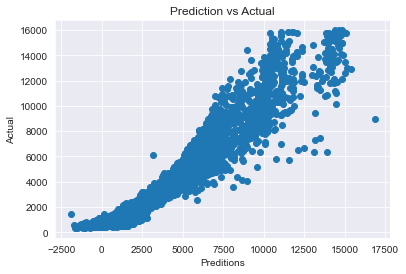

In [44]:
plt.scatter(lr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

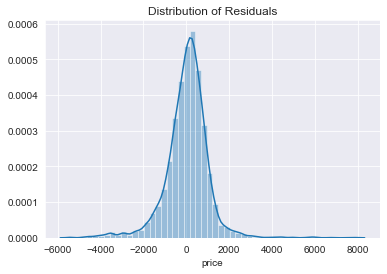

In [45]:
sns.distplot(lr_pred-y_val)
plt.title('Distribution of Residuals')

In [46]:
from sklearn import metrics
lr_R2S = metrics.r2_score(y_val,lr_pred)
lr_MAE = metrics.mean_absolute_error(y_val,lr_pred)
lr_RMSE = np.sqrt(metrics.mean_squared_error(y_val,lr_pred))

print('R-squared: ', lr_R2S)
print('Mean Absolute Error: ', lr_MAE)
print('Root Mean Square Error: ', lr_RMSE)

R-squared:  0.9149338005979464
Mean Absolute Error:  691.8413664571962
Root Mean Square Error:  998.811014424913


### Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X_train)

In [48]:
pr = LinearRegression()
pr.fit(X_poly,y_train)

LinearRegression()

In [49]:
pr_pred = pr.predict(poly_reg.fit_transform(X_val))
PR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":pr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

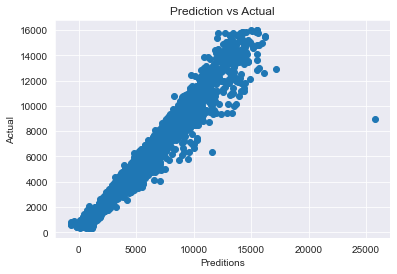

In [50]:
plt.scatter(pr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

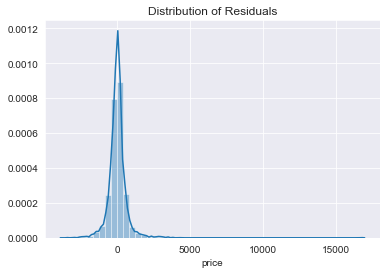

In [51]:
sns.distplot(pr_pred-y_val)
plt.title('Distribution of Residuals')

In [52]:
pr_R2S = metrics.r2_score(y_val,pr_pred)
pr_MAE = metrics.mean_absolute_error(y_val,pr_pred)
pr_RMSE = np.sqrt(metrics.mean_squared_error(y_val,pr_pred))

print('R-squared: ', pr_R2S)
print('Mean Absolute Error: ', pr_MAE)
print('Root Mean Square Error: ', pr_RMSE)

R-squared:  0.9645344566283517
Mean Absolute Error:  385.5501221515693
Root Mean Square Error:  644.9233735323734


### Support Vector Regressor

In [53]:
from sklearn.svm import SVR
svr = SVR()

In [54]:
svr.fit(X_train_scaled,y_train_scaled)

SVR()

In [55]:
svr_pred_scaled = svr.predict(X_val_scaled)
svr_pred = sc_y.inverse_transform(svr_pred_scaled)
SVR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":svr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

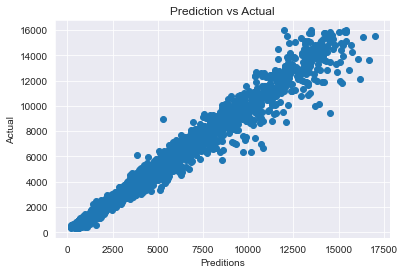

In [56]:
plt.scatter(svr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

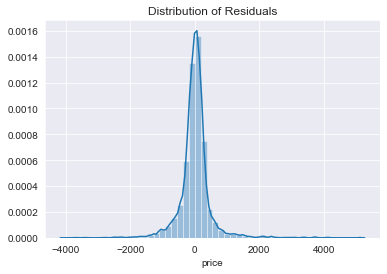

In [57]:
sns.distplot(svr_pred-y_val)
plt.title('Distribution of Residuals')

In [58]:
svr_R2S = metrics.r2_score(y_val,svr_pred)
svr_MAE = metrics.mean_absolute_error(y_val,svr_pred)
svr_RMSE = np.sqrt(metrics.mean_squared_error(y_val,svr_pred))

print('R-squared: ', svr_R2S)
print('Mean Absolute Error: ', svr_MAE)
print('Root Mean Square Error: ', svr_RMSE)

R-squared:  0.9792554822892493
Mean Absolute Error:  290.1007301589494
Root Mean Square Error:  493.2379444742937


### Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [60]:
dtr_pred = dtr.predict(X_val)
DTR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":dtr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

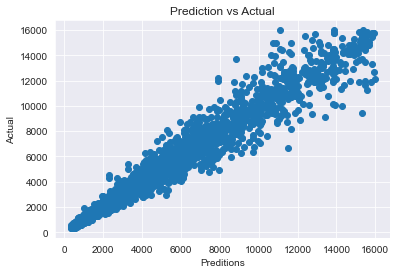

In [61]:
plt.scatter(dtr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

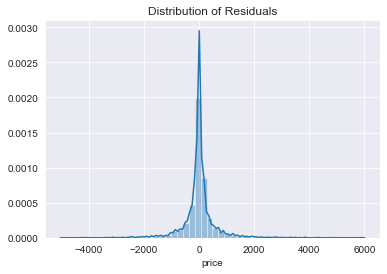

In [62]:
sns.distplot(dtr_pred-y_val)
plt.title('Distribution of Residuals')

In [63]:
dtr_R2S = metrics.r2_score(y_val,dtr_pred)
dtr_MAE = metrics.mean_absolute_error(y_val,dtr_pred)
dtr_RMSE = np.sqrt(metrics.mean_squared_error(y_val,dtr_pred))

print('R-squared: ', dtr_R2S)
print('Mean Absolute Error: ', dtr_MAE)
print('Root Mean Square Error: ', dtr_RMSE)

R-squared:  0.9660398556521741
Mean Absolute Error:  330.32988905808133
Root Mean Square Error:  631.0874907499551


### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor()
ran.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
ran_pred = ran.predict(X_val)
RAN_model = pd.DataFrame({"True Values":y_val, "Predicted Values":ran_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

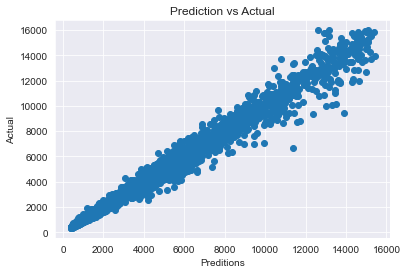

In [66]:
plt.scatter(ran_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

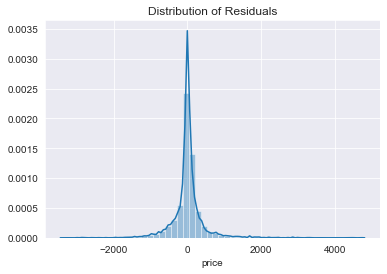

In [67]:
sns.distplot(ran_pred-y_val)
plt.title('Distribution of Residuals')

In [68]:
ran_R2S = metrics.r2_score(y_val,ran_pred)
ran_MAE = metrics.mean_absolute_error(y_val,ran_pred)
ran_RMSE = np.sqrt(metrics.mean_squared_error(y_val,ran_pred))

print('R-squared: ', ran_R2S)
print('Mean Absolute Error: ', ran_MAE)
print('Root Mean Square Error: ', ran_RMSE)

R-squared:  0.9838100639082659
Mean Absolute Error:  235.80308690450292
Root Mean Square Error:  435.7399459758674


### XGBoost Regressor

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
xgb_pred = xgb.predict(X_val)
XGB_model = pd.DataFrame({"True Values":y_val, "Predicted Values":xgb_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

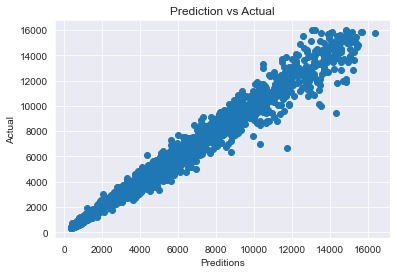

In [71]:
plt.scatter(xgb_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

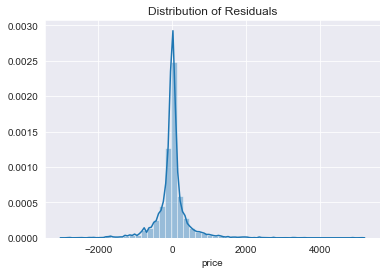

In [72]:
sns.distplot(xgb_pred-y_val)
plt.title('Distribution of Residuals')

In [73]:
xgb_R2S = metrics.r2_score(y_val,xgb_pred)
xgb_MAE = metrics.mean_absolute_error(y_val,xgb_pred)
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_val,xgb_pred))

print('R-squared: ', xgb_R2S)
print('Mean Absolute Error: ', xgb_MAE)
print('Root Mean Square Error: ', xgb_RMSE)

R-squared:  0.9834188601020172
Mean Absolute Error:  242.8375837231865
Root Mean Square Error:  440.9730005965287


## Model Comparison and Selection

The aim of model comparison is to see the best performing model of all six regression models above. The best performing model will become my chosen model for the price prediction
I will evaluate the final performance of my chosen model on the Test dataset


In [74]:
# Place the predicted values of all models side by side along with the true values

all_models = pd.DataFrame({"True Values":y_val,"LR Model":lr_pred,"PR Model":pr_pred,"SVR Model":svr_pred,
                           "DTR Model":dtr_pred,"RAN Model":ran_pred,"XGB Model":xgb_pred})
all_models

,True Values,LR Model,PR Model,SVR Model,DTR Model,RAN Model,XGB Model
16437,1814,1860.145123,1405.832908,1594.894421,1613.0,1728.400,1754.503784
17989,781,1073.382224,537.254917,836.691129,781.0,764.210,763.793030
9667,12821,11040.660782,12085.928669,13244.631607,14107.0,12282.120,12454.758789
13703,680,625.499011,614.905039,657.449285,680.0,702.360,693.097595
6003,4138,4549.288962,4304.794160,4198.102998,4817.0,4271.030,4200.109375
...,...,...,...,...,...,...,...
20124,1861,2010.413013,2037.518728,1994.988955,1795.0,1921.490,1921.272949
17445,940,1532.492774,1073.520241,1127.493555,933.0,951.120,1013.568848
18326,4452,4670.278389,4154.476639,4323.253123,4372.0,4356.100,4338.331055
9879,6221,5924.852736,6414.263927,6397.632730,7098.0,6697.080,6649.981445


In [75]:
# Compare the residual values of all models side by side along with the true values
all_residuals = all_models

for i in ['LR Model','PR Model','SVR Model','DTR Model','RAN Model','XGB Model']:
    all_residuals[i] = all_residuals[i] - all_residuals['True Values']

all_residuals.columns = ['True Values','LR Residual','PR Residual','SVR Residual','DTR Residual','RAN Residual','XGB Residual']
all_residuals

,True Values,LR Residual,PR Residual,SVR Residual,DTR Residual,RAN Residual,XGB Residual
16437,1814,46.145123,-408.167092,-219.105579,-201.0,-85.600,-59.496216
17989,781,292.382224,-243.745083,55.691129,0.0,-16.790,-17.206970
9667,12821,-1780.339218,-735.071331,423.631607,1286.0,-538.880,-366.241211
13703,680,-54.500989,-65.094961,-22.550715,0.0,22.360,13.097595
6003,4138,411.288962,166.794160,60.102998,679.0,133.030,62.109375
...,...,...,...,...,...,...,...
20124,1861,149.413013,176.518728,133.988955,-66.0,60.490,60.272949
17445,940,592.492774,133.520241,187.493555,-7.0,11.120,73.568848
18326,4452,218.278389,-297.523361,-128.746877,-80.0,-95.900,-113.668945
9879,6221,-296.147264,193.263927,176.632730,877.0,476.080,428.981445


Text(0.5, 1.0, 'XGBoost Regressor')

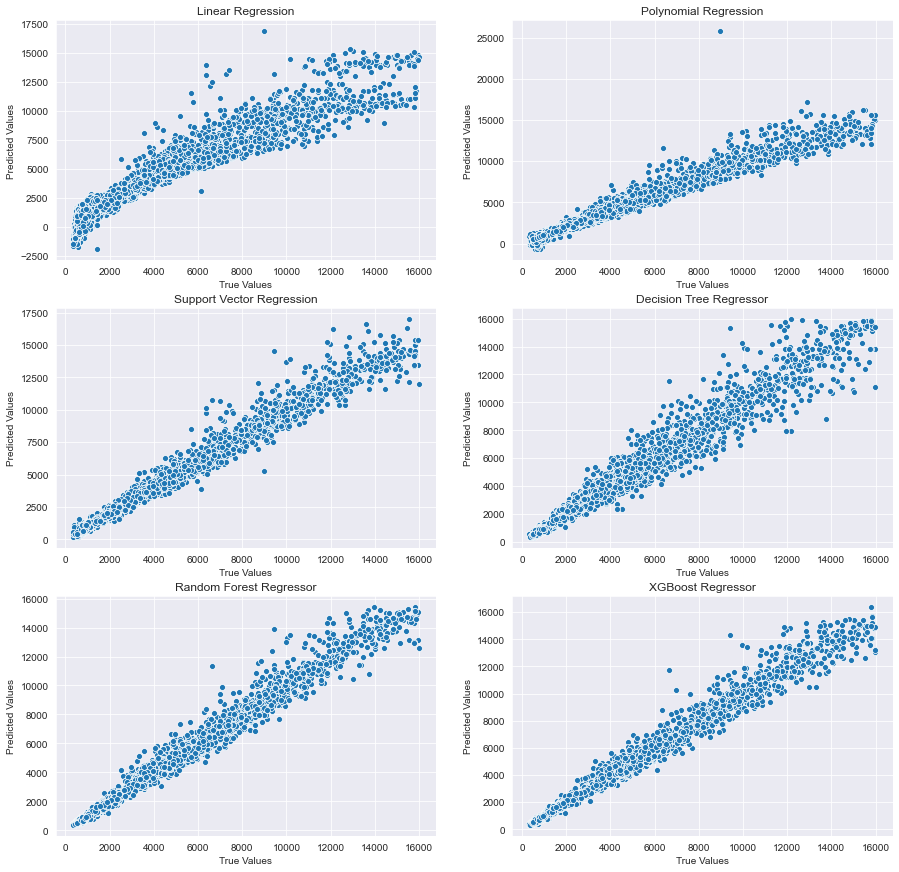

In [76]:
fig , axes= plt.subplots(3, 2, figsize=(15,15))

sns.scatterplot(ax=axes[0,0], data=LR_model, x="True Values", y="Predicted Values").set_title("Linear Regression")
sns.scatterplot(ax=axes[0,1], data=PR_model, x="True Values", y="Predicted Values").set_title("Polynomial Regression")
sns.scatterplot(ax=axes[1,0], data=SVR_model, x="True Values", y="Predicted Values").set_title("Support Vector Regression")
sns.scatterplot(ax=axes[1,1], data=DTR_model, x="True Values", y="Predicted Values").set_title("Decision Tree Regressor")
sns.scatterplot(ax=axes[2,0], data=RAN_model, x="True Values", y="Predicted Values").set_title("Random Forest Regressor")
sns.scatterplot(ax=axes[2,1], data=XGB_model, x="True Values", y="Predicted Values").set_title("XGBoost Regressor")


##### The more straight the plot of the true and predicted values appear to lie along the diagonal, the closer the match between the true and predicted values.
##### Support Vector Regressor, Random Forest Regressor, and XGBoost Regressor models appear to have the closest match of predicted and true value
I will compare the performance of the models further using the R-squared, Mean Absolute Error, and Root Mean Squared Error

In [77]:
# Compare the performance of the models using the R-squared, Mean Absolute Error, and Root Mean Square Error

models = pd.DataFrame(data= {"LR":[lr_R2S, lr_MAE , lr_RMSE], "PR":[pr_R2S, pr_MAE , pr_RMSE], 
                       "SVR":[svr_R2S, svr_MAE , svr_RMSE], "DTR":[dtr_R2S, dtr_MAE , dtr_RMSE], 
                       "RAN":[ran_R2S, ran_MAE , ran_RMSE], "XGB":[xgb_R2S, xgb_MAE , xgb_RMSE]},
                      index = ['R Squared', 'Mean Absolute Error', 'Root Mean Squared Error'])
models

,LR,PR,SVR,DTR,RAN,XGB
R Squared,0.914934,0.964534,0.979255,0.966040,0.983810,0.983419
Mean Absolute Error,691.841366,385.550122,290.100730,330.329889,235.803087,242.837584
Root Mean Squared Error,998.811014,644.923374,493.237944,631.087491,435.739946,440.973001


##### Random Forest Regressor is the best performing model using the R-squared score, Mean Absolute Error, and Root Mean Square Error
Random Forest Regressor is my chosen model. I will run the test dataset on this model to test its performance on unseen data

## Final Model Testing
I am going to test the performance of the Random Forest Regressor in the Test dataset (unseen data)

In [78]:
ran_test_pred = ran.predict(X_test)
final_model_testing = pd.DataFrame({"True Values":y_test, "Predicted Values":ran_test_pred})
final_model_testing

,True Values,Predicted Values
1040,874,818.930000
26288,15842,15035.090000
12002,1672,1844.280000
9569,7850,7266.363333
310,2142,2124.360000
...,...,...
21305,6858,8244.940000
10767,6918,7907.230000
19815,1239,1591.010000
9966,678,594.610000


Text(0.5, 1.0, 'Prediction vs Actual')

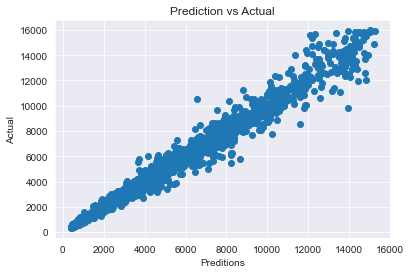

In [79]:
plt.scatter(ran_test_pred ,y_test)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

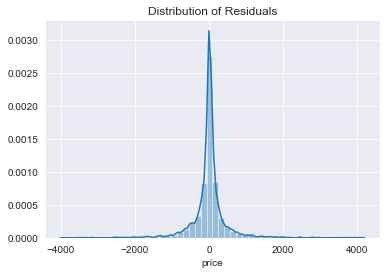

In [80]:
sns.distplot(ran_test_pred-y_test)
plt.title('Distribution of Residuals')

In [81]:
final_model_R2S = metrics.r2_score(y_test,ran_test_pred)
final_model_MAE = metrics.mean_absolute_error(y_test,ran_test_pred)
final_model_RMSE = np.sqrt(metrics.mean_squared_error(y_test,ran_test_pred))

final_model_performance = pd.DataFrame(data= {"Model Performance":[final_model_R2S, final_model_MAE , final_model_RMSE]}, 
                      index = ['R Squared', 'Mean Absolute Error', 'Root Mean Squared Error'])

final_model_performance

,Model Performance
R Squared,0.982203
Mean Absolute Error,249.128970
Root Mean Squared Error,464.002385


##### The selected model performed well on the test data with an R-squared of 98% and a Root Mean Squared Error of  $464, where prices ranges from 326 to 18.8K

##    